In [28]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [29]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

In [30]:
train_df = pd.read_csv('../newKDDTrain+.txt', header=None)

columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'
]
# Rename the columns of the DataFrame
train_df.columns = columns

train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [31]:
test_df = pd.read_csv('../newKDDTest+.txt', header=None)

test_columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'
]
# Rename the columns of the DataFrame
test_df.columns = columns

test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [32]:
df = pd.concat([train_df, test_df])

In [33]:
df['class']

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
22539     normal
22540     normal
22541    anomaly
22542     normal
22543    anomaly
Name: class, Length: 148517, dtype: object

In [34]:
df.isnull().values.any()

False

In [35]:
len(df.columns)

42

In [36]:
df.shape

(148517, 42)

In [37]:
# 'label' 열의 값이 'normal.'이면 0으로, 'normal.'이 아니면 1로 변경
df['class'] = df['class'].apply(lambda x: 0 if x == 'normal' else 1)

# 변경된 데이터프레임 확인
print(df.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [38]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
df['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])
df['service'] = label_encoder.fit_transform(df['service'])
df['flag'] = label_encoder.fit_transform(df['flag'])

# 인코딩된 데이터프레임 확인
print(df.head())

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.

In [39]:
# 상관계수 계산
correlation_matrix = df.corr()
label_correlation = correlation_matrix['class'].drop('class')

# 상관계수가 높은 컬럼 선택
top_features = label_correlation.abs().sort_values(ascending=False).head(5).index  # 상위 5개 컬럼 선택



In [40]:
print(top_features)

Index(['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'logged_in', 'flag'],
      dtype='object')


In [41]:
# ' Label' 컬럼과의 상관계수 계산
label_correlation = correlation_matrix['class'].drop('class')

# 상관계수가 0.4를 넘는 컬럼 선택
significant_features = label_correlation[abs(label_correlation) > 0.38]
print("Columns with correlation greater than 0.4 with 'Label':")
print(significant_features)

Columns with correlation greater than 0.4 with 'Label':
flag                       -0.629556
logged_in                  -0.664117
count                       0.524108
serror_rate                 0.588474
srv_serror_rate             0.586636
same_srv_rate              -0.708911
dst_host_srv_count         -0.692577
dst_host_same_srv_rate     -0.667624
dst_host_serror_rate        0.589936
dst_host_srv_serror_rate    0.593690
Name: class, dtype: float64


In [42]:
significant_features.sort_values().index

Index(['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'logged_in', 'flag', 'count', 'srv_serror_rate', 'serror_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate'],
      dtype='object')

In [43]:
columns_list = ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'logged_in', 'flag', 'count', 'srv_serror_rate', 'serror_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'class']
df=df[columns_list]


In [44]:
df.shape

(148517, 11)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((133665, 11), (14852, 11))

In [46]:
X_train['class'].value_counts()

0    69334
1    64331
Name: class, dtype: int64

In [47]:
normal = X_train[X_train['class'] == 0]
normal.shape

(69334, 11)

In [48]:
y_train = normal['class']
X_train_normal = normal.drop(labels='class', axis=1)

y_test = X_test['class']
X_test_normal = X_test.drop(labels='class', axis=1)

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_normal)
scaler.fit(X_test_normal)

X_train_ft = scaler.transform(X_train_normal)
X_test = scaler.transform(X_test_normal)

In [50]:
#reshape inputs for LSTM [samples, timesteps, features]

X_train_ft = X_train_ft.reshape(X_train_ft.shape[0], 1, X_train_ft.shape[1])
print("Training data shape:", X_train_ft.shape)

X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)


Training data shape: (69334, 1, 10)
Test data shape: (14852, 1, 10)


In [51]:
X_train_ft.shape, X_test.shape

((69334, 1, 10), (14852, 1, 10))

In [52]:
!pip install keras_self_attention

Defaulting to user installation because normal site-packages is not writeable


In [53]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Conv1D, Conv1DTranspose
from keras.models import Model
from keras import regularizers
from keras_self_attention import SeqWeightedAttention, SeqSelfAttention

In [54]:
latent_dim = 4
inter_dim = 6

def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0]
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + z_log_sigma * epsilon

def vae_loss(x, x_decoded_mean, z_mean, z_log_sigma):
    reconstruction_loss = K.sum(K.square(x - x_decoded_mean))
    kl_loss = -0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    total_loss = K.mean(reconstruction_loss + kl_loss)
    return total_loss

def cvae(X):
    timesteps, features = X.shape[1], X.shape[2]
    input_x = Input(shape=(timesteps, features), name='InputTimeSeries')

    # intermediate dimension
    h = Conv1D(filters=48, kernel_size=5, padding="same", strides=1, activation="selu")(input_x)
    h = Conv1D(filters=32, kernel_size=5, padding="same", strides=1, activation="selu")(h)
    h = Conv1D(filters=16, kernel_size=5, padding="same", strides=1, activation="selu")(h)
    h = LSTM(inter_dim, activation='selu', return_sequences=True)(h)
    h = SeqSelfAttention(attention_activation='sigmoid')(h)
    h = LSTM(inter_dim, activation='selu', return_sequences=False)(h)
    h = Dense(inter_dim, activation='selu')(h)
    h = Dense(inter_dim, activation='selu')(h)

    # z_layer
    z_mean = Dense(latent_dim)(h)
    z_log_sigma = Dense(latent_dim)(h)
    z = Lambda(sampling)([z_mean, z_log_sigma])

    # Reconstruction decoder
    decoder1 = RepeatVector(timesteps)(z)
    decoder1 = Dense(inter_dim, activation='selu')(decoder1)
    decoder1 = Dense(inter_dim, activation='selu')(decoder1)
    decoder1 = LSTM(inter_dim, activation='selu', return_sequences=True)(decoder1)
    decoder1 = LSTM(inter_dim, activation='selu', return_sequences=True)(decoder1)
    decoder1 = SeqSelfAttention(attention_activation='sigmoid')(decoder1)
    decoder1 = Conv1DTranspose(filters=16, kernel_size=5, padding="same", strides=1, activation="selu")(decoder1)
    decoder1 = Conv1DTranspose(filters=32, kernel_size=5, padding="same", strides=1, activation="selu")(decoder1)
    decoder1 = Conv1DTranspose(filters=48, kernel_size=5, padding="same", strides=1, activation="selu")(decoder1)
    decoder1 = TimeDistributed(Dense(features))(decoder1)
    model = Model(input_x, decoder1)

    model.add_loss(vae_loss(input_x, decoder1, z_mean, z_log_sigma))
    return model

model = cvae(X_train_ft)
model.compile(optimizer='adam', metrics=['accuracy'])

model.summary()

history = model.fit(X_train_ft, X_train_ft,
                    shuffle=True,
                    epochs=10,
                    validation_split=0.05,
                    batch_size=64).history

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 InputTimeSeries (InputLaye  [(None, 1, 10)]              0         []                            
 r)                                                                                               
                                                                                                  
 conv1d_3 (Conv1D)           (None, 1, 48)                2448      ['InputTimeSeries[0][0]']     
                                                                                                  
 conv1d_4 (Conv1D)           (None, 1, 32)                7712      ['conv1d_3[0][0]']            
                                                                                                  
 conv1d_5 (Conv1D)           (None, 1, 16)                2576      ['conv1d_4[0][0]']      

 tf.math.multiply_1 (TFOpLa  (None,)                      0         ['tf.math.reduce_sum_3[0][0]']
 mbda)                                                                                            
                                                                                                  
 tf.__operators__.add_3 (TF  (None,)                      0         ['tf.math.reduce_sum_2[0][0]',
 OpLambda)                                                           'tf.math.multiply_1[0][0]']  
                                                                                                  
 tf.math.reduce_mean_1 (TFO  ()                           0         ['tf.__operators__.add_3[0][0]
 pLambda)                                                           ']                            
                                                                                                  
 add_loss_1 (AddLoss)        ()                           0         ['tf.math.reduce_mean_1[0][0]'
          

2024-08-14 07:52:08.772965: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f4d949fa310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-14 07:52:08.773017: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-08-14 07:52:08.773031: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2024-08-14 07:52:08.778331: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-14 07:52:08.864509: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1030/1030 [==============================] - 31s 22ms/step - loss: 15.9163 - accuracy: 0.4583 - val_loss: 5.2993 - val_accuracy: 0.1765
Epoch 2/10
1030/1030 [==============================] - 21s 20ms/step - loss: 4.5918 - accuracy: 0.3706 - val_loss: 3.6210 - val_accuracy: 0.2853
Epoch 3/10
1030/1030 [==============================] - 21s 21ms/step - loss: 2.7577 - accuracy: 0.3989 - val_loss: 2.6204 - val_accuracy: 0.2700
Epoch 4/10
1030/1030 [==============================] - 21s 20ms/step - loss: 2.3464 - accuracy: 0.3884 - val_loss: 2.2234 - val_accuracy: 0.7502
Epoch 5/10
1030/1030 [==============================] - 20s 20ms/step - loss: 1.9640 - accuracy: 0.4302 - val_loss: 1.8934 - val_accuracy: 0.2801
Epoch 6/10
1030/1030 [==============================] - 21s 20ms/step - loss: 1.7030 - accuracy: 0.4469 - val_loss: 1.6128 - val_accuracy: 0.3450
Epoch 7/10
1030/1030 [==============================] - 21s 20ms/step - loss: 1.4736 - accuracy: 0.4425 - val_loss: 1.2198 - val_accur

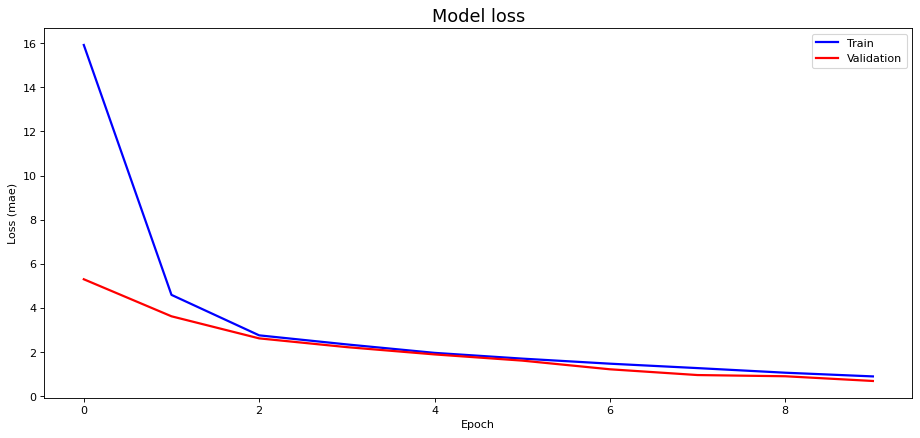

In [55]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [56]:
def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

In [57]:
valid_x_predictions = model.predict(X_test)
mse = np.mean(np.power(flatten(X_test) - flatten(valid_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test.tolist()})

465/465 [==============================] - 3s 4ms/step


In [58]:
error_df

,reconstruction_error,true_class
0,0.000203,0
1,0.000084,0
2,0.000082,0
3,0.000096,0
4,0.162909,1
...,...,...
14847,0.003864,1
14848,0.000108,0
14849,0.246112,1
14850,0.000527,0


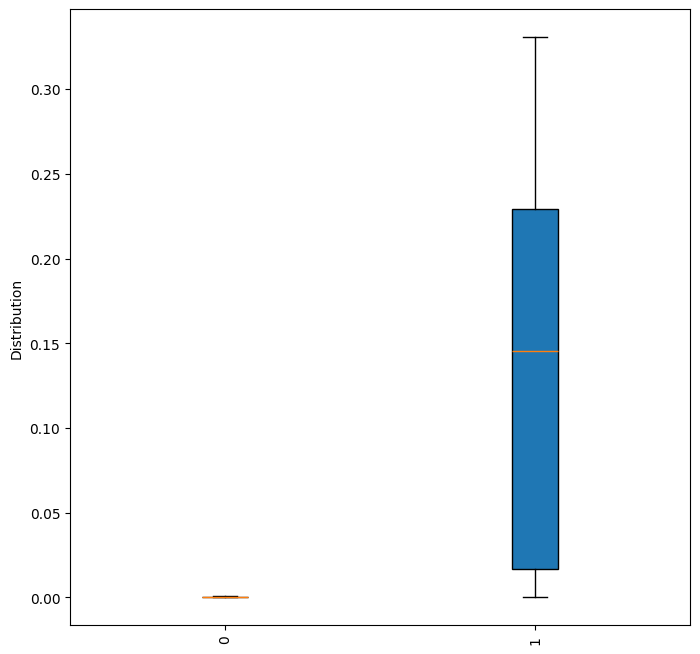

In [59]:
import matplotlib.pyplot as plt

# 데이터프레임 준비
true_class = error_df['true_class'].astype(str)
reconstruction_error = error_df['reconstruction_error']

# 박스 플롯 그리기
plt.figure(figsize=(8, 8))
plt.boxplot(
    [reconstruction_error[true_class == cls] for cls in sorted(true_class.unique())],
    labels=sorted(true_class.unique()),
    showfliers=False,
    vert=True,
    patch_artist=True
)

plt.ylabel('Distribution')
plt.xticks(rotation=90)
plt.show()


In [66]:
new_data = X_train.iloc[0, :-1].values  # 마지막 특징을 제거하여 10개로 만듦


In [67]:
import numpy as np

def is_anomaly(sample, model, threshold):
    # sample의 형태를 조정 (timesteps, features)
    sample = np.expand_dims(sample[:-1], axis=0)  # 마지막 특징 제거하여 10개로 만듦
    sample = np.expand_dims(sample, axis=0)  # 모델 입력 형태에 맞게 차원 추가
    
    print("Expanded shape:", sample.shape)
    
    reconstructed_sample = model.predict(sample)
    sample_error = np.mean(np.power(sample - reconstructed_sample, 2))
    return sample_error > threshold

# 새로운 데이터로 테스트
new_data = X_train.iloc[0].values  # X_train에서 첫 번째 샘플 선택
if is_anomaly(new_data, model, threshold):
    print("The sample is an anomaly.")
else:
    print("The sample is normal.")


Expanded shape: (1, 1, 10)
1/1 [==============================] - 0s 74ms/step
The sample is an anomaly.
